In [1]:
import numpy as np
import pandas as pd

!conda install -c conda-forge folium=0.5.0 --yes
import folium

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

Solving environment: done

# All requested packages already installed.



In [2]:
survey = pd.read_csv('Topic_Survey_Assignment.csv')
survey

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [3]:
survey.rename(columns={'Unnamed: 0':'data_science_topics'}, inplace=True)

In [4]:
survey.sort_values(by='Very interested', ascending=False, inplace=True)
survey

,data_science_topics,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136
2,Data Journalism,429,1081,610


In [5]:
survey.set_index('data_science_topics', inplace=True)
survey

,Very interested,Somewhat interested,Not interested
data_science_topics,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [64]:
survey

,Very interested,Somewhat interested,Not interested,total
data_science_topics,,,,
Data Analysis / Statistics,1688,444,60,2192
Machine Learning,1629,477,74,2180
Data Visualization,1340,734,102,2176
Big Data (Spark / Hadoop),1332,729,127,2188
Deep Learning,1263,770,136,2169
Data Journalism,429,1081,610,2120


In [7]:
very_interested = survey['Very interested']
somewhat_interested = survey['Somewhat interested']
not_interested = survey['Not interested']

In [8]:
survey['total'] = survey.sum(axis=1)
pctg_vi = [0,0,0,0,0,0]
pctg_si = [0,0,0,0,0,0]
pctg_ni = [0,0,0,0,0,0]

for i in range(6):
    pctg_vi[i] = format(survey.iloc[i,0]/survey.iloc[i,3], '.4f')
    pctg_si[i] = format(survey.iloc[i,1]/survey.iloc[i,3], '.4f')
    pctg_ni[i] = format(survey.iloc[i,2]/survey.iloc[i,3], '.4f')
print(pctg_vi)
print(pctg_si)
print(pctg_ni)

['0.7701', '0.7472', '0.6158', '0.6088', '0.5823', '0.2024']
['0.2026', '0.2188', '0.3373', '0.3332', '0.3550', '0.5099']
['0.0274', '0.0339', '0.0469', '0.0580', '0.0627', '0.2877']


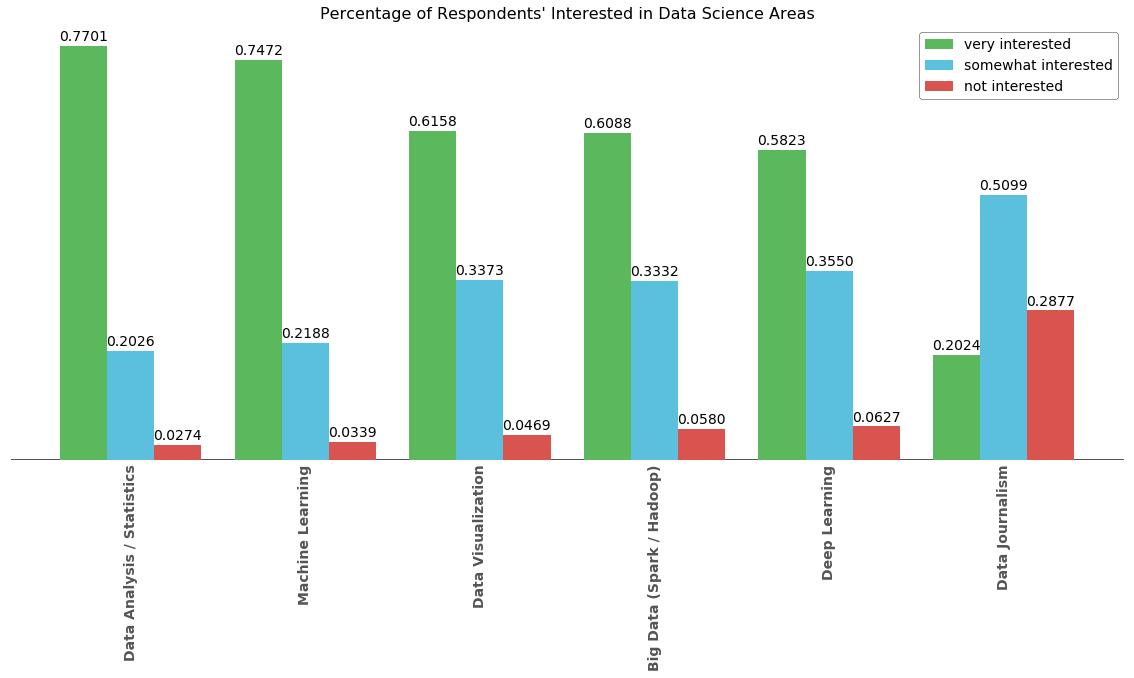

In [96]:
ind = np.arange(len(pctg_vi))
width = 0.27

fig, ax = plt.subplots(figsize=(20,8))
bar1 = ax.bar(ind-width, very_interested, width, color='#5cb85c', label='very interested')
bar2 = ax.bar(ind, somewhat_interested, width, color='#5bc0de', label='somewhat interested')
bar3 = ax.bar(ind+width, not_interested, width, color='#d9534f', label='not interested')

ax.set_ylabel('People interested')
ax.set_title("Percentage of Respondents' Interested in Data Science Areas", fontdict={'fontsize':16})
#ax.set_xlabel('Data Science Area')
ax.set_xticks(ind)
ax.set_xticklabels(survey.index, rotation=90, fontdict={'fontweight':700})
ax.set_facecolor('White')
ax.tick_params(axis='x', direction='inout', bottom=True, width=240, length=2, labelsize=14)
ax.legend(loc='upper right',labels=['very interested', 'somewhat interested', 'not interested'], facecolor='white', edgecolor='black', fontsize=14)
ax.get_yaxis().set_visible(False)

for i in range(6):
    ax.text(i-width-0.14, very_interested[i] + 20, '{}'.format(pctg_vi[i]), fontsize=14)
    ax.text(i-0.14, somewhat_interested[i]+20, '{}'.format(pctg_si[i]), fontsize=14)
    ax.text(i+width-0.14, not_interested[i]+20, '{}'.format(pctg_ni[i]), fontsize=14)


